In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams

# 1. Pre-processing the datasets

In [2]:
# Loading all the training datasets 

Train_Beneficiary = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Beneficiary.csv')
Train_Inpatient = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Inpatient.csv')
Train_Outpatient = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Outpatient.csv')
Fraud_label = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train.csv')

In [3]:
Train_Beneficiary.shape # number of rows & columns

(138556, 25)

In [4]:
Train_Inpatient.shape # number of rows & columns

(40474, 30)

In [5]:
Train_Outpatient.shape # number of rows & columns

(517737, 27)

In [6]:
Fraud_label.shape # number of rows & columns

(5410, 2)

In [7]:
pd.set_option('display.max_columns', 100) # shows all the columns

### Columns dropped

In [8]:
Train_Beneficiary = Train_Beneficiary.drop(['DOD'], axis = 1)
Train_Inpatient = Train_Inpatient.drop(['ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs
Train_Outpatient = Train_Outpatient.drop(['ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

### Checking for Missing Values

In [9]:
Train_Beneficiary.isnull().sum() # row = 138556

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
dtype: int64

In [10]:
Train_Inpatient.isnull().sum() # row = 40474

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
dtype: int64

In [11]:
Train_Outpatient.isnull().sum() # row = 517737

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

### Checking rows that has missing values for all 3 physician columns

In [12]:
Train_Outpatient.loc[(Train_Outpatient.AttendingPhysician.isnull() == True) & \
                     (Train_Outpatient.OperatingPhysician.isnull() == True) & ((Train_Outpatient.OtherPhysician.isnull() == True))].head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,ClmAdmitDiagnosisCode
941,BENE11270,CLM390618,2009-06-01,2009-06-01,PRV54885,200,NaN,NaN,NaN,43391,V5861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,43491
1674,BENE11483,CLM488391,2009-07-25,2009-08-02,PRV52071,50,NaN,NaN,NaN,1740,73399,53081,73390,1629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2531,BENE11718,CLM388753,2009-05-31,2009-05-31,PRV56562,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7862
2540,BENE11721,CLM352199,2009-05-11,2009-05-11,PRV56016,50,NaN,NaN,NaN,V289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,V7612
2569,BENE11727,CLM220164,2009-02-28,2009-02-28,PRV51021,200,NaN,NaN,NaN,5184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,78609


In [13]:
Train_Inpatient.loc[(Train_Inpatient.AttendingPhysician.isnull() == True) & \
                    (Train_Inpatient.OperatingPhysician.isnull() == True) & ((Train_Inpatient.OtherPhysician.isnull() == True))].head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5
147,BENE11546,CLM47949,2009-04-22,2009-04-24,PRV56253,9000,NaN,NaN,NaN,2009-04-22,5762,1068.0,2009-04-24,421,1977,56723,5849,56211,7824,2724,2720,53010,5990,NaN,NaN,NaN,NaN,NaN,NaN
855,BENE14117,CLM65737,2009-08-28,2009-08-31,PRV54894,10000,NaN,NaN,NaN,2009-08-28,5939,1068.0,2009-08-31,672,25040,78791,40390,78904,41401,4280,59080,5789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,BENE14147,CLM47613,2009-04-19,2009-04-25,PRV54561,300,NaN,NaN,NaN,2009-04-19,79902,1068.0,2009-04-25,261,4241,2768,4019,40390,42820,92401,60000,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,BENE15713,CLM62650,2009-08-05,2009-08-22,PRV54986,19000,NaN,NaN,NaN,2009-08-05,55010,NaN,2009-08-22,370,2113,7804,56089,1962,2851,1888,41401,5609,5119,NaN,4573.0,NaN,NaN,NaN,NaN
2152,BENE18544,CLM34474,2009-01-19,2009-01-25,PRV52021,3000,NaN,NaN,NaN,2009-01-19,5770,1068.0,2009-01-25,433,5770,56210,3051,9992,79439,7856,57140,2859,NaN,NaN,3722.0,7994.0,4414.0,NaN,NaN


### Checking # of unique values in physicians columns (There are 3 types)

In [14]:
Train_Outpatient.AttendingPhysician.nunique()

74109

In [15]:
Train_Outpatient.OperatingPhysician.nunique()

28532

In [16]:
Train_Outpatient.OtherPhysician.nunique()

44388

### Replacing NAs with 0s & None

In [17]:
Train_Inpatient[['DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']] = Train_Inpatient[[\
                                                                                             'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].fillna(0)

Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']] = Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].fillna(0)

Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = \
Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = \
Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

### Merging Beneficiary & Fraud label data with inpatient & outpatient data

In [18]:
Merged_Inpatient = pd.merge(Train_Beneficiary, Train_Inpatient, how = 'inner', on = 'BeneID')
Merged_Inpatient = pd.merge(Merged_Inpatient, Fraud_label, how = 'inner', on = 'Provider')

Merged_Outpatient = pd.merge(Train_Beneficiary, Train_Outpatient, how = 'inner', on = 'BeneID')
Merged_Outpatient = pd.merge(Merged_Outpatient, Fraud_label, how = 'inner', on = 'Provider')

In [19]:
Merged_Inpatient.shape

(40474, 53)

In [20]:
Merged_Outpatient.shape

(517737, 50)

In [21]:
Merged_Outpatient.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
P

In [22]:
Merged_Inpatient.head() # showing 1st 5 rows of the dataset

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes
1,BENE17521,1913-12-01,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes
2,BENE21718,1922-10-01,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes
3,BENE22934,1930-07-01,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,0,0,0,8154.0,0.0,0.0,0.0,0.0,Yes
4,BENE24402,1925-09-01,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,None,2009-01-08,1748,1068.0,2009-01-12,593,2330,0,0,0,0,0,0,0,0,0,8543.0,0.0,0.0,0.0,0.0,Yes


In [23]:
Merged_Outpatient.head() # showing 1st 5 rows of the dataset

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,56409,Yes
1,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Yes
2,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,71947,Yes
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,None,None,20381,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Yes
4,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,None,None,V6546,4280,2449,V854,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Yes


### Replacing values for some of the columns

In [24]:
replace_two = ['Gender', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', \
                      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

Merged_Inpatient.RenalDiseaseIndicator = Merged_Inpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Inpatient[replace_two] = Merged_Inpatient[replace_two].replace(2, 0)
#Merged_Inpatient['PotentialFraud'] = Merged_Inpatient['PotentialFraud'].replace(['Yes', 'No'], [1, 0]) 

Merged_Outpatient.RenalDiseaseIndicator = Merged_Outpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Outpatient[replace_two] = Merged_Outpatient[replace_two].replace(2, 0)
# Merged_Outpatient['PotentialFraud'] = Merged_Outpatient['PotentialFraud'].replace(['Yes', 'No'], [1, 0]) 

In [25]:
Merged_Inpatient.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
P

In [26]:
Merged_Outpatient.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
P

In [27]:
# printing all the unique values to make sure the columns are good to go (Inpatient)
for column in replace_two:
    print(column, Merged_Inpatient[column].unique())

Gender [1 0]
ChronicCond_Alzheimer [1 0]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [1 0]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [1 0]
ChronicCond_Diabetes [1 0]
ChronicCond_IschemicHeart [1 0]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [1 0]
ChronicCond_stroke [1 0]


In [28]:
# printing all the unique values to make sure the columns are good to go (Outpatient)
for column in replace_two:
    print(column, Merged_Outpatient[column].unique())

Gender [0 1]
ChronicCond_Alzheimer [0 1]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [0 1]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [0 1]
ChronicCond_Diabetes [0 1]
ChronicCond_IschemicHeart [0 1]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [0 1]
ChronicCond_stroke [0 1]


### Converting all date columns to datetime

In [29]:
#Merged_Inpatient['DOB'] = pd.to_datetime(Merged_Inpatient['DOB'])
Merged_Inpatient['ClaimStartDt'] = pd.to_datetime(Merged_Inpatient['ClaimStartDt'])
Merged_Inpatient['ClaimEndDt'] = pd.to_datetime(Merged_Inpatient['ClaimEndDt'])
Merged_Inpatient['AdmissionDt'] = pd.to_datetime(Merged_Inpatient['AdmissionDt'])
Merged_Inpatient['DischargeDt'] = pd.to_datetime(Merged_Inpatient['DischargeDt'])


#Merged_Outpatient['DOB'] = pd.to_datetime(Merged_Outpatient['DOB'])
Merged_Outpatient['ClaimStartDt'] = pd.to_datetime(Merged_Outpatient['ClaimStartDt'])
Merged_Outpatient['ClaimEndDt'] = pd.to_datetime(Merged_Outpatient['ClaimEndDt'])

### Adding new feature columns

In [30]:
# adding new column that has per patient total visit count

visit_count_per_patients_in = Merged_Inpatient.groupby('BeneID')['ClaimID'].agg(['count'])

Merged_Inpatient = Merged_Inpatient.merge(visit_count_per_patients_in, how = 'inner', on = 'BeneID')
Merged_Inpatient = Merged_Inpatient.rename(columns = {'count': 'Total_Claim_Count'})


visit_count_per_patients_out = Merged_Outpatient.groupby('BeneID')['ClaimID'].agg(['count'])

Merged_Outpatient = Merged_Outpatient.merge(visit_count_per_patients_out, how = 'inner', on = 'BeneID')
Merged_Outpatient = Merged_Outpatient.rename(columns = {'count': 'Total_Claim_Count'})




# Calculating Age of all the patients with respect to 2009
Merged_Inpatient['Age'] = int(2009) - Merged_Inpatient.DOB.apply(lambda x: x.split('-')[0]).astype('int')
Merged_Outpatient['Age'] = int(2009) - Merged_Outpatient.DOB.apply(lambda x: x.split('-')[0]).astype('int')




# Column for per patient total chronic condition counts
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', \
                      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

Merged_Inpatient['Chronic_Condition_Count'] = Merged_Inpatient[chronic_conditions].sum(axis = 1)

Merged_Outpatient['Chronic_Condition_Count'] = Merged_Outpatient[chronic_conditions].sum(axis = 1)



# column for per patients hospital stay count
Merged_Inpatient['Hospital_Stay'] = (Merged_Inpatient['DischargeDt'] - Merged_Inpatient['AdmissionDt']).dt.days

Merged_Inpatient['Claim_Start_Day'] = Merged_Inpatient['ClaimStartDt'].dt.dayofweek
Merged_Outpatient['Claim_Start_Day'] = Merged_Outpatient['ClaimStartDt'].dt.dayofweek

Merged_Inpatient['Claim_Start_Week'] = Merged_Inpatient['ClaimStartDt'].dt.strftime("%V")
Merged_Outpatient['Claim_Start_Week'] = Merged_Outpatient['ClaimStartDt'].dt.strftime("%V")

In [31]:
Merged_Inpatient.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
P

In [32]:
Merged_Outpatient.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
P

### Dropping age columns

In [33]:
Merged_Inpatient = Merged_Inpatient.drop('DOB', axis = 1)
Merged_Outpatient = Merged_Outpatient.drop('DOB', axis = 1)

### Merging Inpatient & Outpatient columns

In [34]:
Merged_Inpatient['Type'] = 'Inpatient'
Merged_Outpatient['Type'] = 'Outpatient'

In [35]:
Merged_Inpatient.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,3,66,7,6,6,15,Inpatient
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,3,66,7,2,0,36,Inpatient
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,3,66,7,3,3,38,Inpatient
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,1,96,5,12,1,04,Inpatient
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,1,87,2,18,5,42,Inpatient


In [36]:
Merged_Outpatient.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Claim_Start_Day,Claim_Start_Week,Type
0,BENE11002,0,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,56409,Yes,1,73,0,6,41,Outpatient
1,BENE11004,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Yes,12,87,6,1,02,Outpatient
2,BENE11004,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,71947,Yes,12,87,6,3,04,Outpatient
3,BENE11004,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,None,None,20381,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Yes,12,87,6,1,06,Outpatient
4,BENE11004,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,None,None,V6546,4280,2449,V854,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Yes,12,87,6,1,10,Outpatient


In [39]:
Merged_Inpatient.shape

(40474, 59)

In [40]:
Merged_Outpatient.shape

(517737, 55)

In [41]:
merged_in_out = pd.concat([Merged_Inpatient, Merged_Outpatient], axis = 0)

In [42]:
merged_in_out.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,3,66,7,6.0,6,15,Inpatient
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,3,66,7,2.0,0,36,Inpatient
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,3,66,7,3.0,3,38,Inpatient
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,1,96,5,12.0,1,04,Inpatient
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,1,87,2,18.0,5,42,Inpatient


In [43]:
merged_in_out.isnull().sum()

BeneID                                  0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt                   0
ClaimID                           

In [44]:
merged_in_out[['AdmissionDt', 'DischargeDt']] = merged_in_out[['AdmissionDt', 'DischargeDt']].astype('str').replace('NaT', 0)
merged_in_out[['DiagnosisGroupCode', 'Hospital_Stay']] = merged_in_out[['DiagnosisGroupCode', 'Hospital_Stay']].fillna(0)

In [45]:
merged_in_out.isnull().sum()

BeneID                             0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
Provider                           0
I

In [46]:
merged_in_out.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,3,66,7,6.0,6,15,Inpatient
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,3,66,7,2.0,0,36,Inpatient
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,3,66,7,3.0,3,38,Inpatient
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,1,96,5,12.0,1,04,Inpatient
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,1,87,2,18.0,5,42,Inpatient


In [47]:
merged_in_out.to_csv('/Users/suborna/Github/Capstone_Project/Data/Merged_train.csv', index = False)

# Exploratory Data Analysis

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [20]:
Merged_train = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Merged_train.csv', low_memory=False)

In [18]:
np.sort(Merged_train.loc[Merged_train.State == 10]['County'].unique())

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660])

In [71]:
Merged_train.loc[Merged_train.PotentialFraud == 'Yes'].groupby(['State'])['PotentialFraud'].agg('count').to_frame().sort_values(ascending = False, by = 'PotentialFraud').head(40)

,PotentialFraud
State,
5,30335
10,17512
33,17492
39,11448
45,10135
31,9112
49,8613
23,8538
14,8509


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text yticklabel objects>)

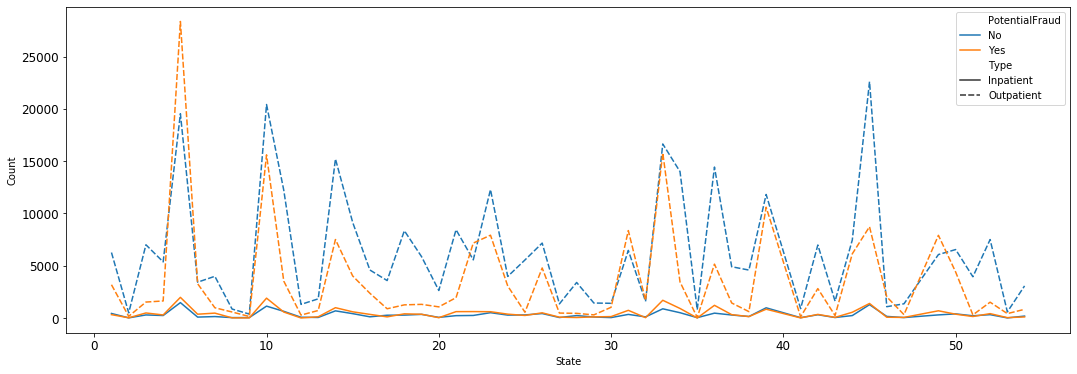

In [42]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['State', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'State', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 <a list of 8 Text yticklabel objects>)

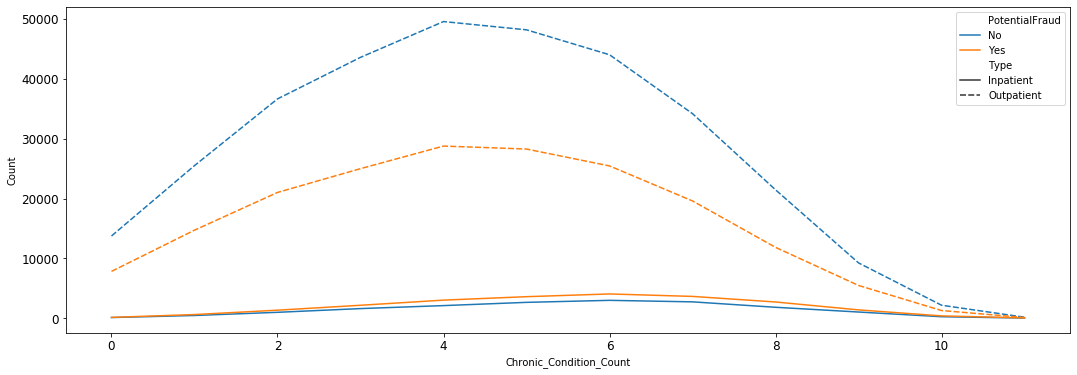

In [43]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['Chronic_Condition_Count', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'Chronic_Condition_Count', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text yticklabel objects>)

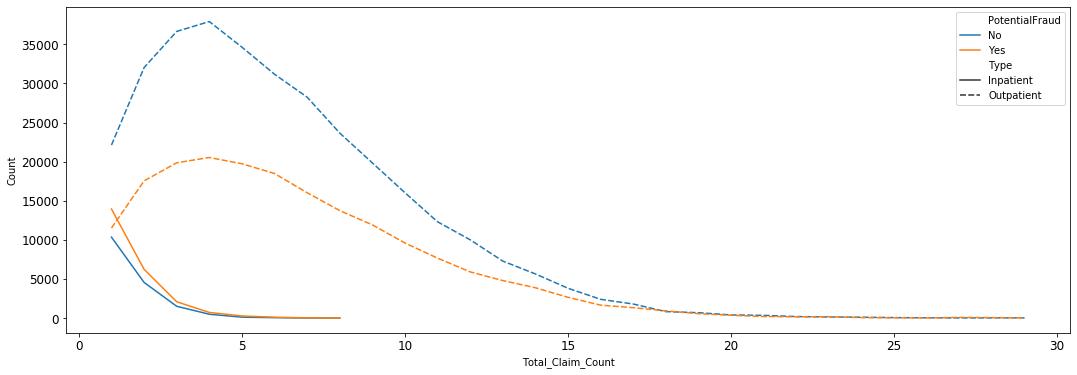

In [44]:
rcParams['figure.figsize'] = 18, 6
df3 = pd.DataFrame(Merged_train.groupby(['Total_Claim_Count', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'Total_Claim_Count', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df3)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 <a list of 9 Text yticklabel objects>)

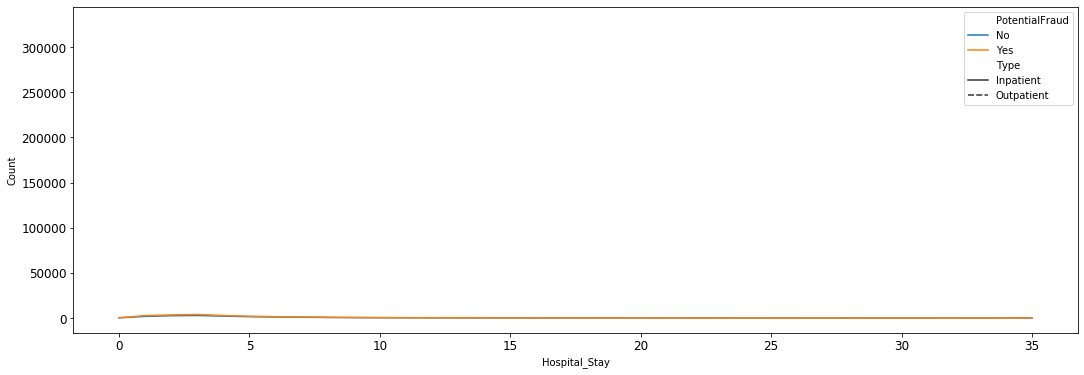

In [45]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['Hospital_Stay', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'Hospital_Stay', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]),
 <a list of 10 Text yticklabel objects>)

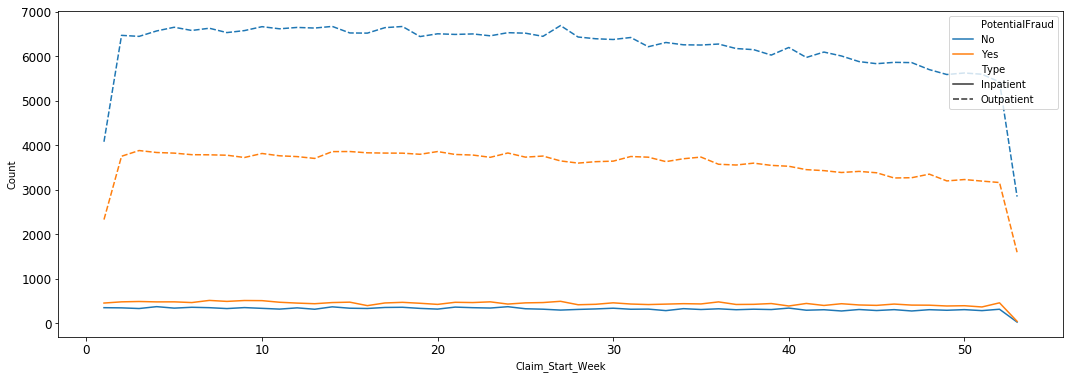

In [46]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['Claim_Start_Week', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'Claim_Start_Week', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text yticklabel objects>)

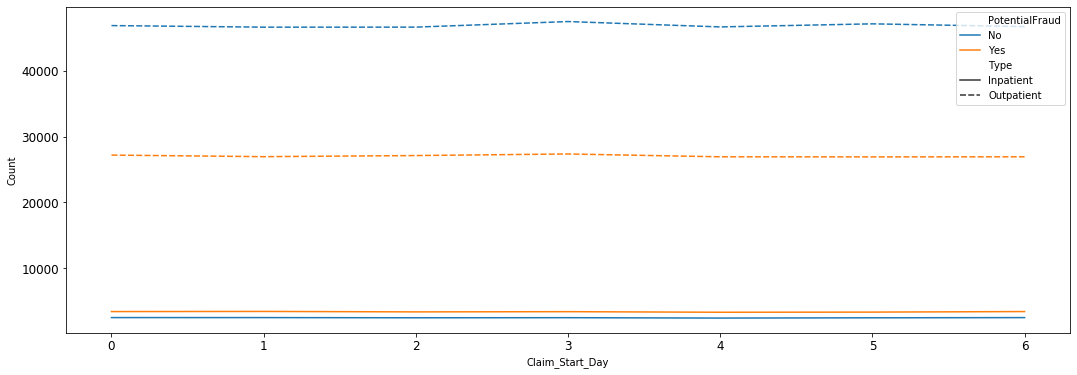

In [47]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['Claim_Start_Day', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'Claim_Start_Day', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [54]:
189394 / (328343+328343)

0.28840876766064755

,Type,PotentialFraud,Count
0,Inpatient,No,17072
1,Inpatient,Yes,23402
2,Outpatient,No,328343
3,Outpatient,Yes,189394


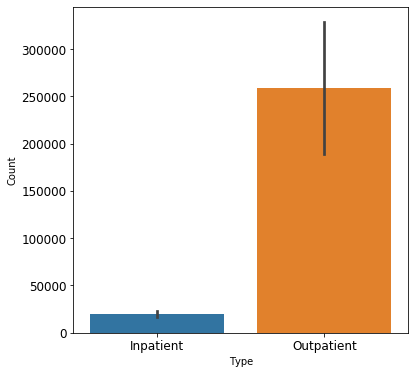

In [50]:
rcParams['figure.figsize'] = 6, 6
df = pd.DataFrame(Merged_train.groupby(['Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.barplot(x = 'Type', y = 'Count', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
df

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 <a list of 9 Text yticklabel objects>)

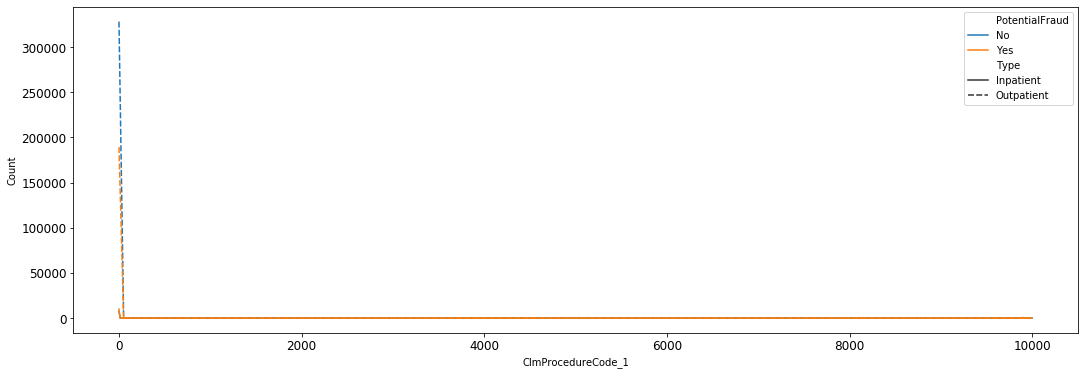

In [49]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['ClmProcedureCode_1', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'ClmProcedureCode_1', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 <a list of 9 Text yticklabel objects>)

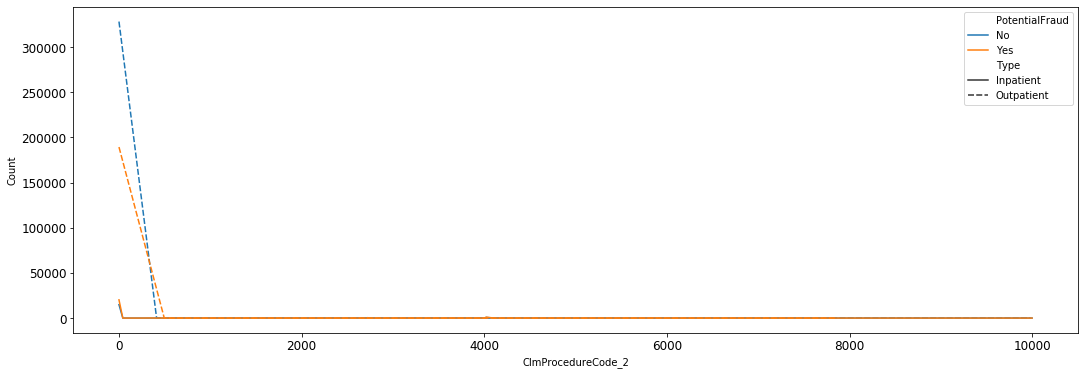

In [50]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['ClmProcedureCode_2', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'ClmProcedureCode_2', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 <a list of 9 Text yticklabel objects>)

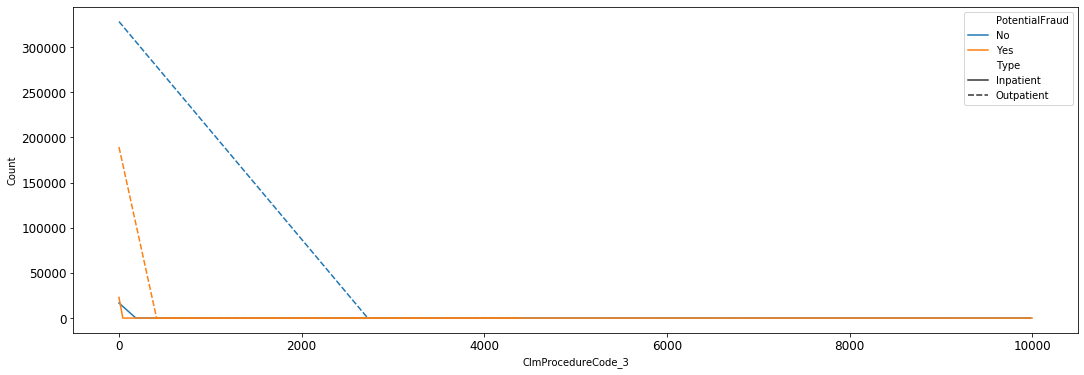

In [51]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['ClmProcedureCode_3', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'ClmProcedureCode_3', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 <a list of 9 Text yticklabel objects>)

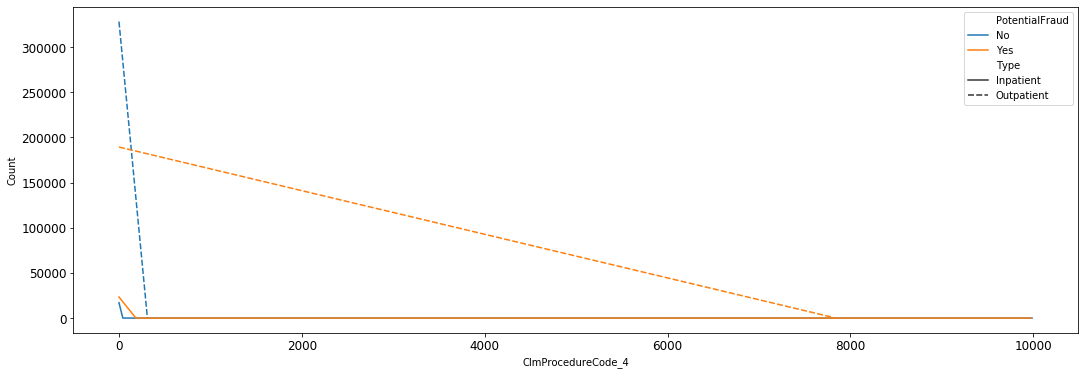

In [52]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['ClmProcedureCode_4', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'ClmProcedureCode_4', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 <a list of 9 Text yticklabel objects>)

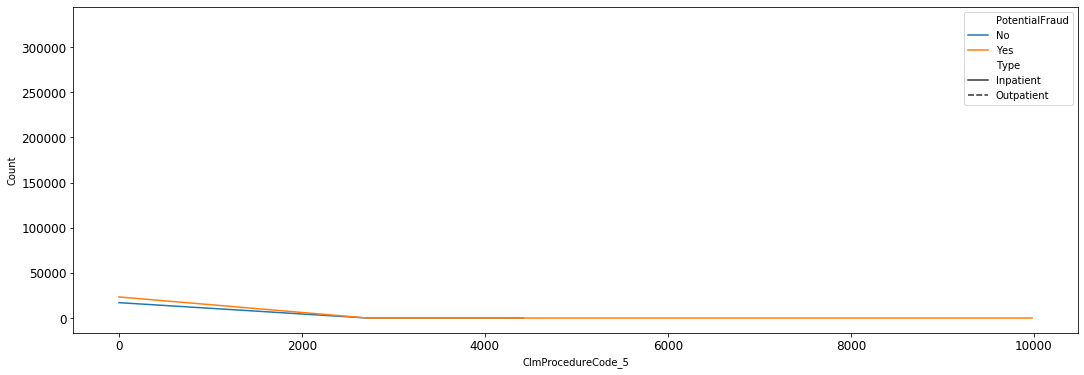

In [53]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.groupby(['ClmProcedureCode_5', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'ClmProcedureCode_5', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [54]:
Merged_train.loc[Merged_train.PotentialFraud == 'Yes'].groupby(['State', 'PotentialFraud'])['PotentialFraud'].agg('count').sort_values(ascending = False).head(15)

State  PotentialFraud
5      Yes               30335
10     Yes               17512
33     Yes               17492
39     Yes               11448
45     Yes               10135
31     Yes                9112
49     Yes                8613
23     Yes                8538
14     Yes                8509
22     Yes                7798
44     Yes                6709
36     Yes                6381
26     Yes                5301
50     Yes                4782
15     Yes                4635
Name: PotentialFraud, dtype: int64

Text(0.5, 1.0, 'California')

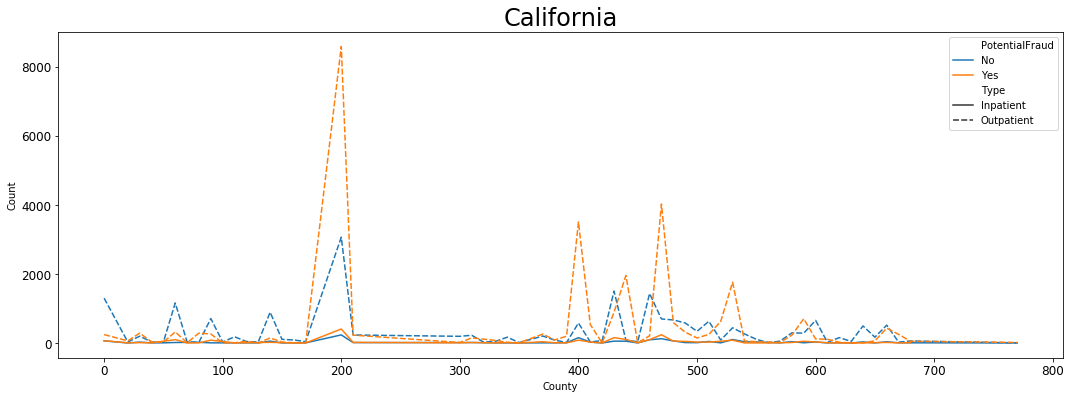

In [55]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.loc[Merged_train.State == 5].\
                  groupby(['County', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'County', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('California', fontsize = 24)

Text(0.5, 1.0, 'Florida')

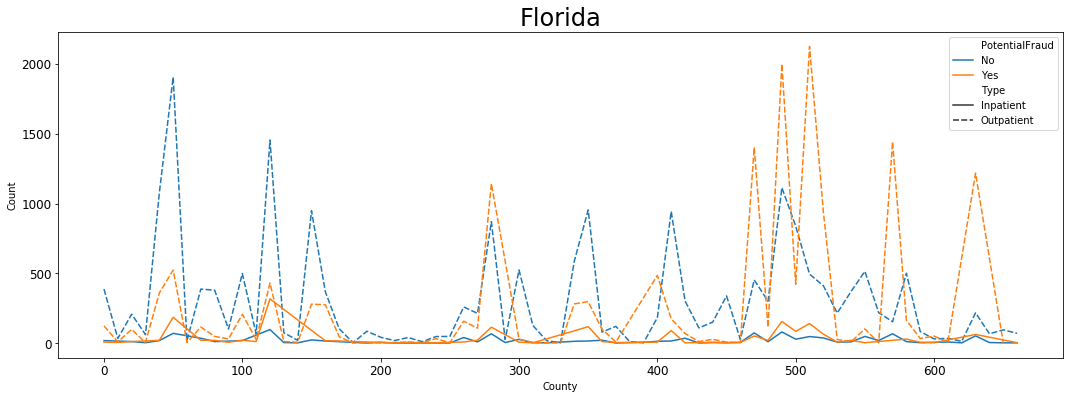

In [56]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.loc[Merged_train.State == 10].\
                  groupby(['County', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'County', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Florida', fontsize = 24)

Text(0.5, 1.0, 'New York')

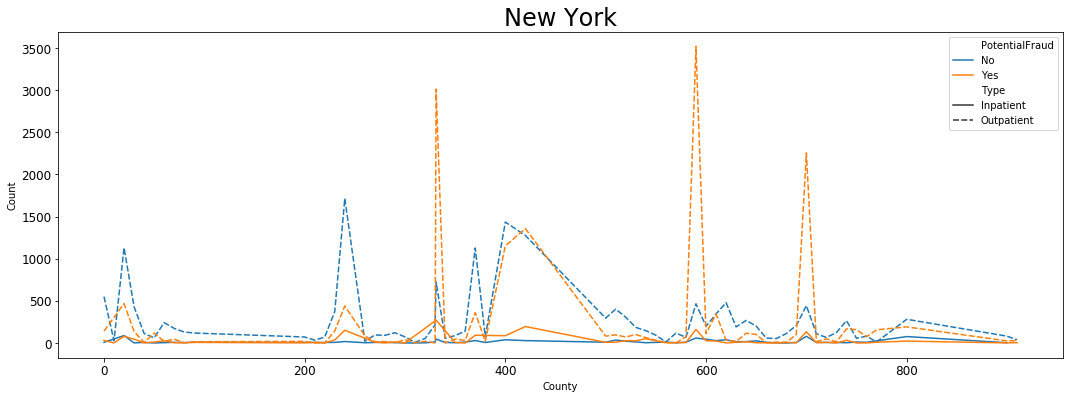

In [57]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.loc[Merged_train.State == 33].\
                  groupby(['County', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'County', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('New York', fontsize = 24)

Text(0.5, 1.0, 'Pennsylvania')

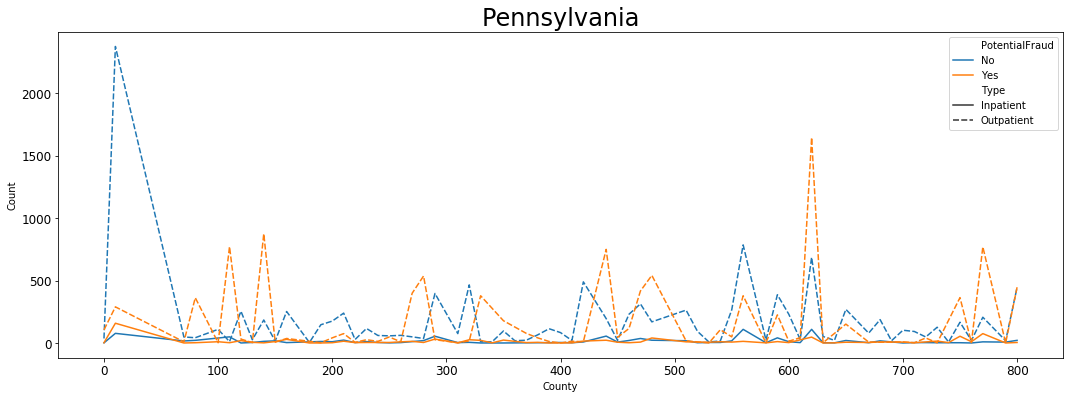

In [58]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.loc[Merged_train.State == 39].\
                  groupby(['County', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'County', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Pennsylvania', fontsize = 24)

Text(0.5, 1.0, 'Texas')

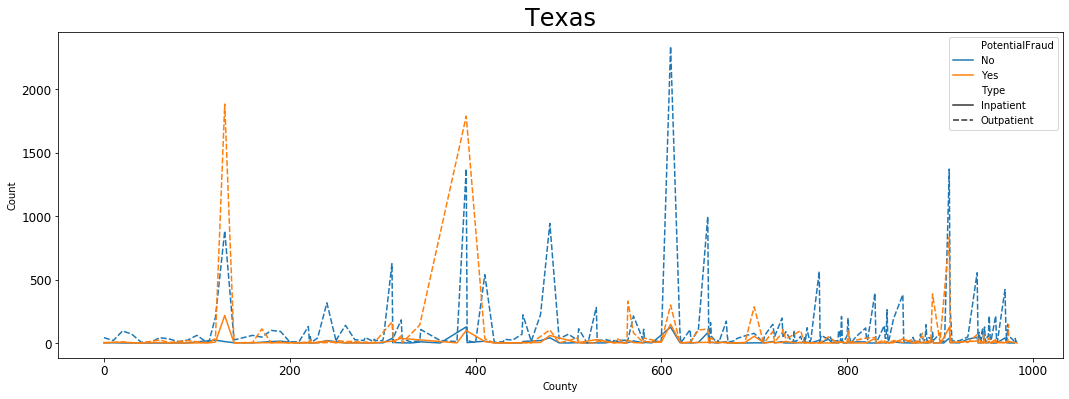

In [59]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.loc[Merged_train.State == 45].\
                  groupby(['County', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'County', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Texas', fontsize = 24)

,Age,Type,PotentialFraud,Count
158,66,Outpatient,Yes,379
162,67,Outpatient,Yes,323
166,68,Outpatient,Yes,345
170,69,Outpatient,Yes,407
174,70,Outpatient,Yes,375
178,71,Outpatient,Yes,317
182,72,Outpatient,Yes,447
186,73,Outpatient,Yes,301
190,74,Outpatient,Yes,357
194,75,Outpatient,Yes,326


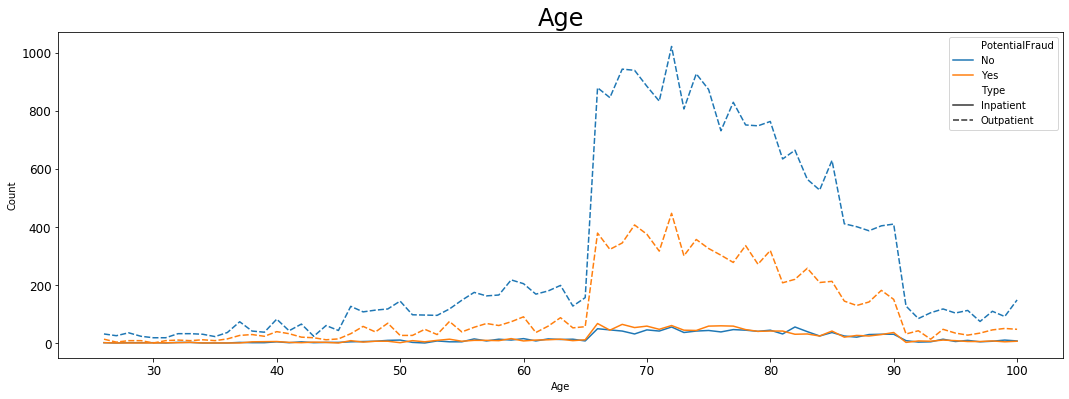

In [63]:
rcParams['figure.figsize'] = 18, 6
df = pd.DataFrame(Merged_train.loc[Merged_train.State == 45].groupby(['Age', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.lineplot(x = 'Age', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Age', fontsize = 24)
df.loc[(df.PotentialFraud == 'Yes') & (df.Type == 'Outpatient')].sort_values(by = 'Count', ascending = False).head(20).sort_values(by = 'Age')

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 <a list of 11 Text yticklabel objects>)

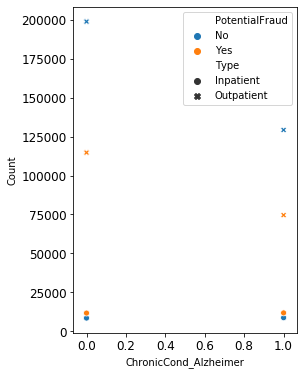

In [61]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_Alzheimer', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_Alzheimer', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 <a list of 10 Text yticklabel objects>)

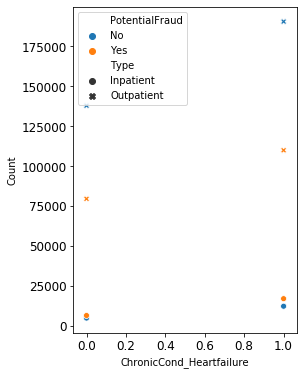

In [62]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_Heartfailure', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_Heartfailure', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 <a list of 11 Text yticklabel objects>)

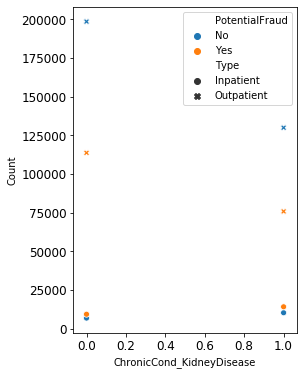

In [63]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_KidneyDisease', 'Type', 'PotentialFraud'])\
                  ['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()

sns.scatterplot(x = 'ChronicCond_KidneyDisease', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text yticklabel objects>)

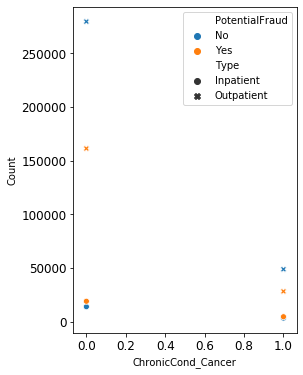

In [64]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_Cancer', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_Cancer', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 7 Text yticklabel objects>)

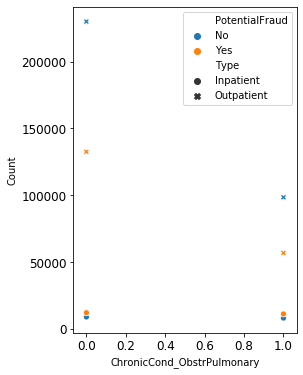

In [65]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_ObstrPulmonary', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_ObstrPulmonary', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 <a list of 10 Text yticklabel objects>)

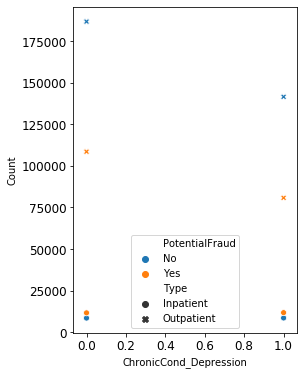

In [66]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_Depression', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_Depression', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 7 Text yticklabel objects>)

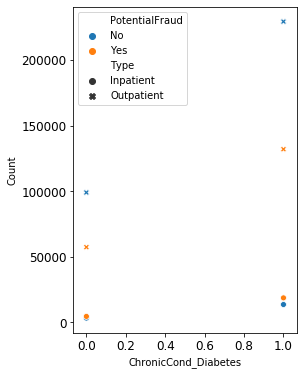

In [67]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_Diabetes', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_Diabetes', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 <a list of 8 Text yticklabel objects>)

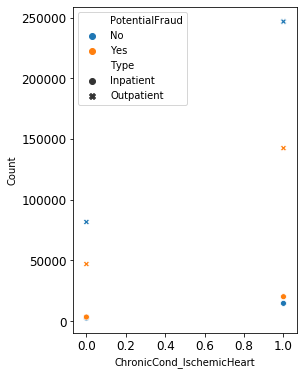

In [68]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_IschemicHeart', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_IschemicHeart', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 7 Text yticklabel objects>)

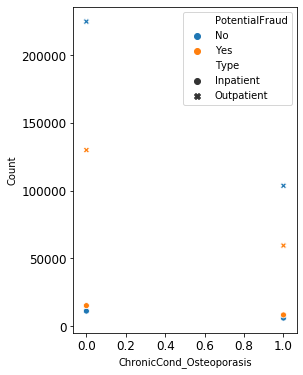

In [69]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_Osteoporasis', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_Osteoporasis', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 7 Text yticklabel objects>)

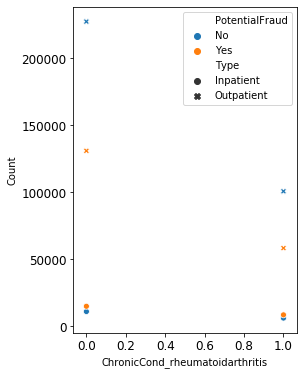

In [70]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_rheumatoidarthritis', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_rheumatoidarthritis', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 <a list of 9 Text yticklabel objects>)

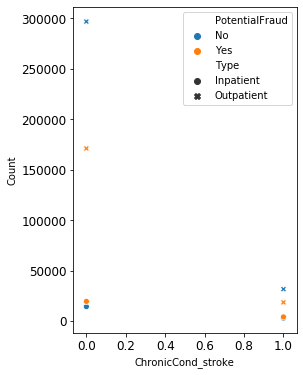

In [71]:
rcParams['figure.figsize'] = 4, 6
df = pd.DataFrame(Merged_train.groupby(['ChronicCond_stroke', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'ChronicCond_stroke', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [22]:
pd.set_option('display.max_columns', 100) # shows all the columns
encoded_diagnosis_code = Merged_train.copy()
encoded_diagnosis_code['ClmDiagnosisCode_1'] = encoded_diagnosis_code['ClmDiagnosisCode_1'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_2'] = encoded_diagnosis_code['ClmDiagnosisCode_2'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_3'] = encoded_diagnosis_code['ClmDiagnosisCode_3'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_4'] = encoded_diagnosis_code['ClmDiagnosisCode_4'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_5'] = encoded_diagnosis_code['ClmDiagnosisCode_5'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_6'] = encoded_diagnosis_code['ClmDiagnosisCode_6'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_7'] = encoded_diagnosis_code['ClmDiagnosisCode_7'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_8'] = encoded_diagnosis_code['ClmDiagnosisCode_8'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_9'] = encoded_diagnosis_code['ClmDiagnosisCode_9'].astype('str').apply(lambda x: '1' if x != '0' else '0')
encoded_diagnosis_code['ClmDiagnosisCode_10'] = encoded_diagnosis_code['ClmDiagnosisCode_10'].astype('str').apply(lambda x: '1' if x != '0' else '0')

In [23]:
conditions = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']

encoded_diagnosis_code['Count_ClmDiagnosisCode'] = encoded_diagnosis_code[conditions].astype('int64').sum(axis = 1)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 <a list of 9 Text yticklabel objects>)

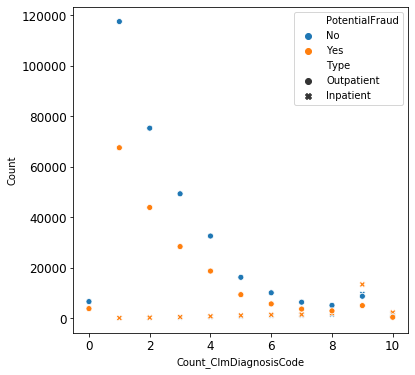

In [83]:
rcParams['figure.figsize'] = 6, 6
df = pd.DataFrame(encoded_diagnosis_code.groupby(['Count_ClmDiagnosisCode', 'Type', 'PotentialFraud'])['PotentialFraud'].agg('count')).rename(columns = {'PotentialFraud': 'Count'}).reset_index()
sns.scatterplot(x = 'Count_ClmDiagnosisCode', y = 'Count', hue = 'PotentialFraud', style = 'Type', data = df)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

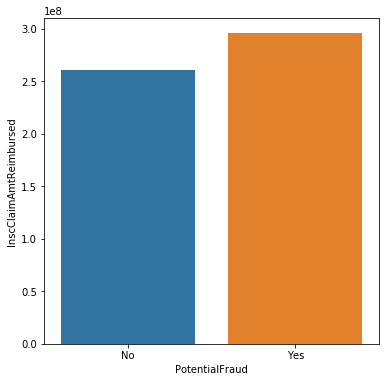

In [88]:
df = Merged_train.groupby('PotentialFraud')['InscClaimAmtReimbursed'].agg('sum').reset_index()
sns.barplot(x = 'PotentialFraud', y = 'InscClaimAmtReimbursed', data = df)

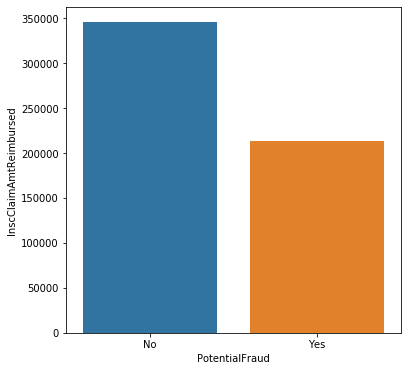

In [89]:
df = Merged_train.groupby('PotentialFraud')['InscClaimAmtReimbursed'].agg('count').reset_index()
sns.barplot(x = 'PotentialFraud', y = 'InscClaimAmtReimbursed', data = df)

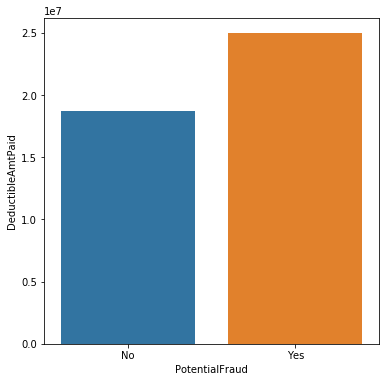

In [90]:
df = Merged_train.groupby('PotentialFraud')['DeductibleAmtPaid'].agg('sum').reset_index()
sns.barplot(x = 'PotentialFraud', y = 'DeductibleAmtPaid', data = df)

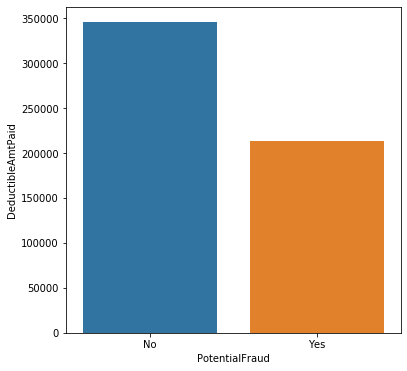

In [91]:
df = Merged_train.groupby('PotentialFraud')['DeductibleAmtPaid'].agg('count').reset_index()
sns.barplot(x = 'PotentialFraud', y = 'DeductibleAmtPaid', data = df)

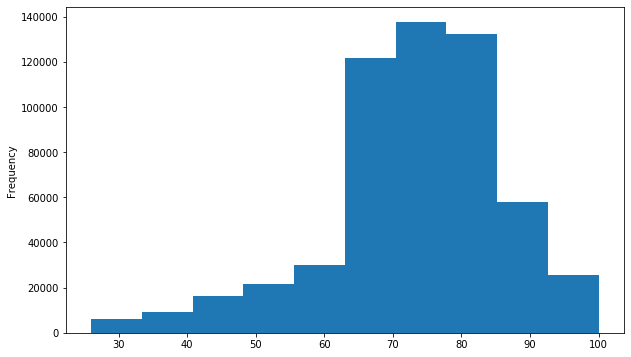

In [98]:
rcParams['figure.figsize'] = 10, 6
Merged_train.Age.plot.hist()

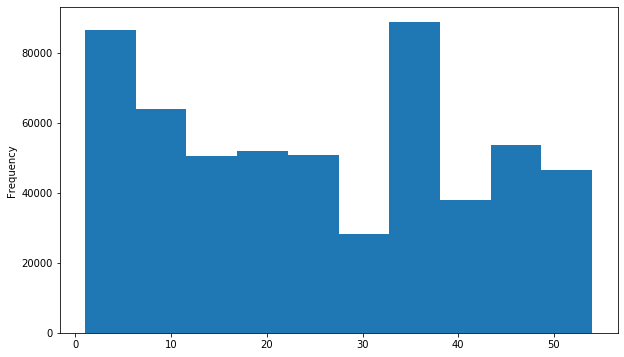

In [99]:
rcParams['figure.figsize'] = 10, 6
Merged_train.State.plot.hist()

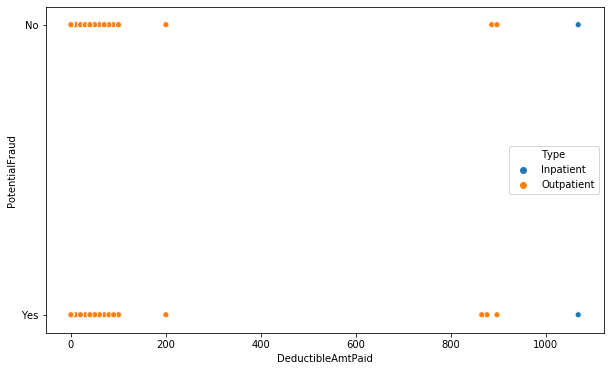

In [100]:
sns.scatterplot(x = 'DeductibleAmtPaid', y = 'PotentialFraud', hue = 'Type', data = Merged_train)

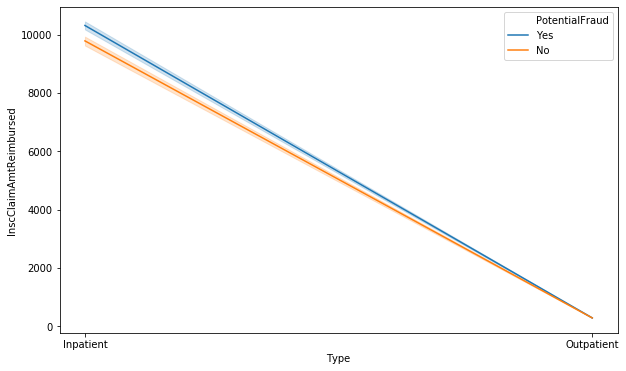

In [110]:
sns.lineplot(y = 'InscClaimAmtReimbursed', x = 'Type', hue = 'PotentialFraud', data = Merged_train)

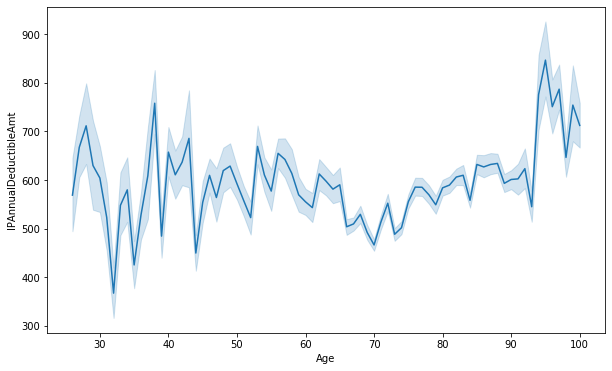

In [116]:
sns.lineplot(x = 'Age', y = 'IPAnnualDeductibleAmt', data = Merged_train)

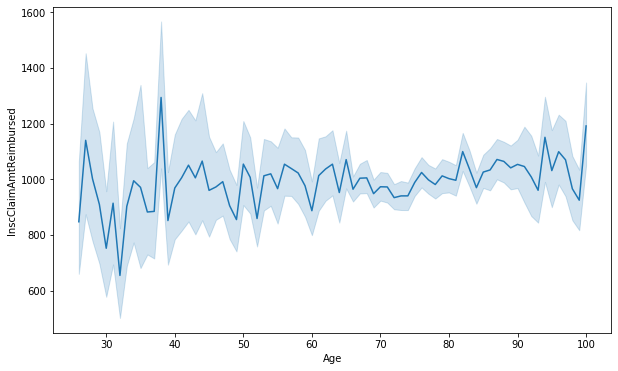

In [117]:
sns.lineplot(x = 'Age', y = 'InscClaimAmtReimbursed', data = Merged_train)

In [ ]:
# sns.pairplot(encoded_diagnosis_code)

In [24]:
encoded_diagnosis_code['AttendingPhysician'] = encoded_diagnosis_code['AttendingPhysician'].astype('str').apply(lambda x: '1' if x != 'None' else '0')
encoded_diagnosis_code['OperatingPhysician'] = encoded_diagnosis_code['OperatingPhysician'].astype('str').apply(lambda x: '1' if x != 'None' else '0')
encoded_diagnosis_code['OtherPhysician'] = encoded_diagnosis_code['OtherPhysician'].astype('str').apply(lambda x: '1' if x != 'None' else '0')

encoded_diagnosis_code['ClmProcedureCode_1'] = encoded_diagnosis_code['ClmProcedureCode_1'].apply(lambda x: 1 if x != 0 else 0)
encoded_diagnosis_code['ClmProcedureCode_2'] = encoded_diagnosis_code['ClmProcedureCode_2'].apply(lambda x: 1 if x != 0 else 0)
encoded_diagnosis_code['ClmProcedureCode_3'] = encoded_diagnosis_code['ClmProcedureCode_3'].apply(lambda x: 1 if x != 0 else 0)
encoded_diagnosis_code['ClmProcedureCode_4'] = encoded_diagnosis_code['ClmProcedureCode_4'].apply(lambda x: 1 if x != 0 else 0)
encoded_diagnosis_code['ClmProcedureCode_5'] = encoded_diagnosis_code['ClmProcedureCode_5'].apply(lambda x: 1 if x != 0 else 0)
encoded_diagnosis_code['PotentialFraud'] = encoded_diagnosis_code['PotentialFraud'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_diagnosis_code['Type'] = encoded_diagnosis_code['Type'].apply(lambda x: 1 if x == 'Inpatient' else 0)

In [25]:
encoded_diagnosis_code.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type,Count_ClmDiagnosisCode
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,1,0,0,2009-04-12,7866,1068.0,2009-04-18,201,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,3,66,7,6.0,6,15,1,9
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,1,1,0,2009-08-31,6186,1068.0,2009-09-02,750,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3,66,7,2.0,0,36,1,3
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,1,0,1,2009-09-17,29590,1068.0,2009-09-20,883,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,3,66,7,3.0,3,38,1,6
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,1,1,1,2009-01-20,45340,1068.0,2009-02-01,987,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,96,5,12.0,1,4,1,9
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,1,1,0,2009-10-17,V5789,1068.0,2009-11-04,941,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,87,2,18.0,5,42,1,9


In [26]:
encoded_diagnosis_code.to_csv('/Users/suborna/Github/Capstone_Project/Data/encoded_merged.csv', index = False)

In [27]:
link_analysis_features = encoded_diagnosis_code[['Gender', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', \
                                        'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
                                       'ChronicCond_Depression', 'ChronicCond_Diabetes',
                                       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', \
                                        'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                                       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                                       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                                       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 
                                        'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                                       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'PotentialFraud', 'Type']].copy().astype('int64')

link_analysis_features['ClaimID'] = encoded_diagnosis_code['ClaimID'].copy()
link_analysis_features = link_analysis_features.set_index('ClaimID')
link_analysis_features.head()

,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Type
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,1,0,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1
CLM66048,1,0,1,0,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
CLM68358,1,0,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
CLM34721,0,0,1,1,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1
CLM72336,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1


In [40]:
link_analysis_features.corr().unstack().sort_values(ascending = False).to_frame().drop_duplicates().head(50)

,,0
Type,Type,1.000000
ClmDiagnosisCode_8,ClmDiagnosisCode_7,0.887254
ClmDiagnosisCode_9,ClmDiagnosisCode_8,0.874522
ClmDiagnosisCode_7,ClmDiagnosisCode_6,0.868984
ClmDiagnosisCode_5,ClmDiagnosisCode_6,0.842733
ClmDiagnosisCode_9,ClmDiagnosisCode_7,0.775923
ClmDiagnosisCode_4,ClmDiagnosisCode_5,0.774628
ClmDiagnosisCode_8,ClmDiagnosisCode_6,0.771009
ClmProcedureCode_1,Type,0.741028
ClmDiagnosisCode_3,ClmDiagnosisCode_4,0.736160


In [46]:
Merged_train.corr().unstack().sort_values(ascending = False).to_frame().drop_duplicates().head(50)

0
Claim_Start_Week           Claim_Start_Week                 1.000000
OPAnnualReimbursementAmt   OPAnnualDeductibleAmt            0.837335
DeductibleAmtPaid          Hospital_Stay                    0.676731
                           InscClaimAmtReimbursed           0.653998
ClmProcedureCode_1         DeductibleAmtPaid                0.645414
IPAnnualReimbursementAmt   IPAnnualDeductibleAmt            0.642743
InscClaimAmtReimbursed     Hospital_Stay                    0.630395
ChronicCond_KidneyDisease  Chronic_Condition_Count          0.585765
ChronicCond_Diabetes       Chronic_Condition_Count          0.572749
ChronicCond_Heartfailure   Chronic_Condition_Count          0.571394
ChronicCond_ObstrPulmonary Chronic_Condition_Count          0.533666
Hospital_Stay              ClmProcedureCode_1               0.523816
ClmProcedureCode_1         InscClaimAmtReimbursed           0.516118
Chronic_Condition_Count    ChronicCond_IschemicHeart        0.515544
Total_Claim_Count          OPAnnualDeductibleAmt            0.497623
Chronic_Condition_Count    ChronicCond_Alzheimer            0.481281
Total_Claim_Count          OPAnnualReimbursementAmt         0.471863
ChronicCond_Depression     Chronic_Condition_Count          0.463311
ChronicCond_KidneyDisease  RenalDiseaseIndicator            0.442357
Chronic_Condition_Count    ChronicCond_rheumatoidarthritis  0.424737
IPAnnualReimbursementAmt   InscClaimAmtReimbursed           0.383701
InscClaimAmtReimbursed     ClmProcedureCode_2               0.376032
ChronicCond_Osteoporasis   Chronic_Condition_Count          0.361786
RenalDiseaseIndicator      OPAnnualDeductibleAmt            0.342015
Chronic_Condition_Count    IPAnnualDeductibleAmt            0.340372
RenalDiseaseIndicator      OPAnnualReimbursementAmt         0.340102
ClmProcedureCode_2         ClmProcedureCode_3               0.332830
ChronicCond_stroke         Chronic_Condition_Count          0.329589
ClmProcedureCode_2         ClmProcedureCode_1               0.321777
                           Hospital_Stay                    0.312524
Chronic_Condition_Count    IPAnnualReimbursementAmt         0.312421
ClmProcedureCode_4         ClmProcedureCode_3               0.312208
ClmProcedureCode_2         DeductibleAmtPaid                0.310652
RenalDiseaseIndicator      Chronic_Condition_Count          0.308979
ChronicCond_KidneyDisease  ChronicCond_Heartfailure         0.307553
IPAnnualDeductibleAmt      DeductibleAmtPaid                0.307332
Total_Claim_Count          Chronic_Condition_Count          0.307191
ChronicCond_Diabetes       ChronicCond_KidneyDisease        0.306715
Chronic_Condition_Count    ChronicCond_Cancer               0.289326
DeductibleAmtPaid          IPAnnualReimbursementAmt         0.279251
ChronicCond_KidneyDisease  IPAnnualReimbursementAmt         0.276924
IPAnnualDeductibleAmt      ChronicCond_KidneyDisease        0.276051
Hospital_Stay              IPAnnualReimbursementAmt         0.275156
ChronicCond_IschemicHeart  ChronicCond_Diabetes             0.272514
ChronicCond_Heartfailure   ChronicCond_Diabetes             0.268339
ChronicCond_IschemicHeart  ChronicCond_Heartfailure         0.268070
ChronicCond_ObstrPulmonary ChronicCond_Heartfailure         0.258467
ChronicCond_KidneyDisease  ChronicCond_ObstrPulmonary       0.257636
ChronicCond_ObstrPulmonary IPAnnualDeductibleAmt            0.253873
OPAnnualDeductibleAmt      ChronicCond_KidneyDisease        0.251555

In [133]:
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

In [ ]:
# frequent_itemsets = apriori(link_analysis_features, min_support=0.1, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# rules.head()

In [214]:
#Merged_train.dtypes

In [89]:
Merged_train['InscReimbursedPercentage'] = Merged_train['InscClaimAmtReimbursed']*100 / (Merged_train['InscClaimAmtReimbursed'] + Merged_train['DeductibleAmtPaid'])

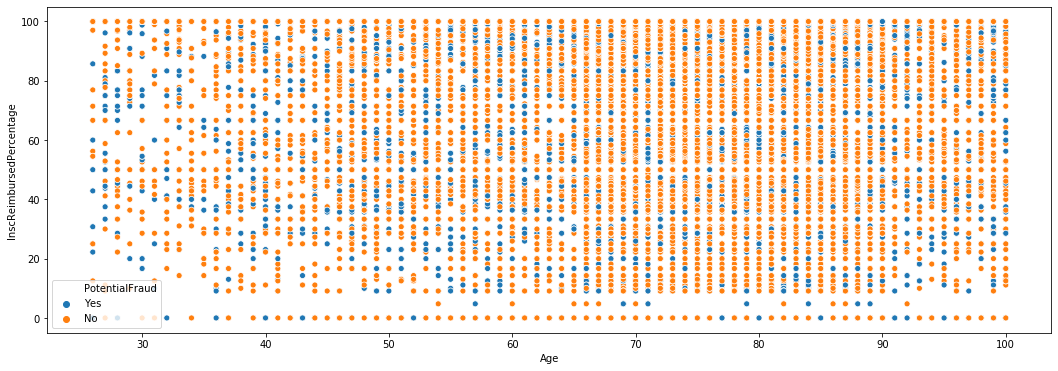

In [91]:
sns.scatterplot(x = 'Age',  y = 'InscReimbursedPercentage', hue = 'PotentialFraud', data = Merged_train.loc[Merged_train.Type == 'Outpatient'])

In [97]:
import datetime

Merged_train['ClaimStartDt'] = pd.to_datetime(Merged_train['ClaimStartDt'])
Merged_train['ClaimEndDt'] = pd.to_datetime(Merged_train['ClaimEndDt'])
Merged_train['Claim_duration'] = Merged_train['ClaimEndDt'] - Merged_train['ClaimStartDt']
Merged_train['Claim_duration'] = Merged_train['Claim_duration'].dt.days

In [98]:
Merged_train.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type,InscReimbursedPercentage,Claim_duration
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,3,66,7,6.0,6,15,Inpatient,96.054382,6
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,3,66,7,2.0,0,36,Inpatient,82.399473,2
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,3,66,7,3.0,3,38,Inpatient,82.399473,3
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,1,96,5,12.0,1,4,Inpatient,94.678094,12
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,1,87,2,18.0,5,42,Inpatient,94.088997,18


### Study the distributions of the durations of average insurance claims (end-start) of the providers? Box-plot/violin-plot based on the PotentialFraud flag. Do you find any differences for none-potential fraud vs potential-fraud providers?


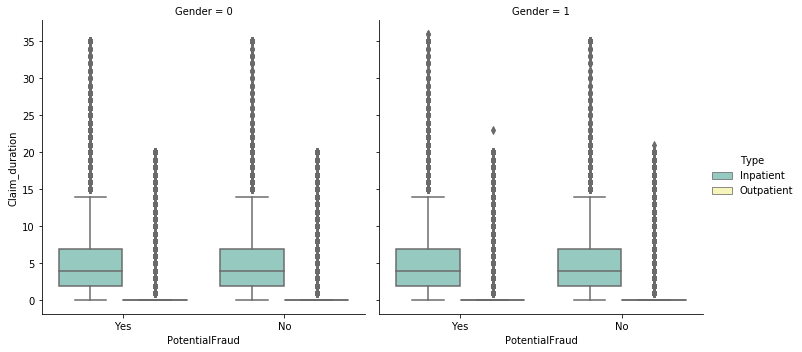

In [108]:
sns.catplot(x = 'PotentialFraud', y = 'Claim_duration', hue = 'Type', col = 'Gender', kind = 'box', palette="Set3", data = Merged_train)

In [113]:
Merged_train['TotalClaimAmount'] = Merged_train['DeductibleAmtPaid'] + Merged_train['InscClaimAmtReimbursed']

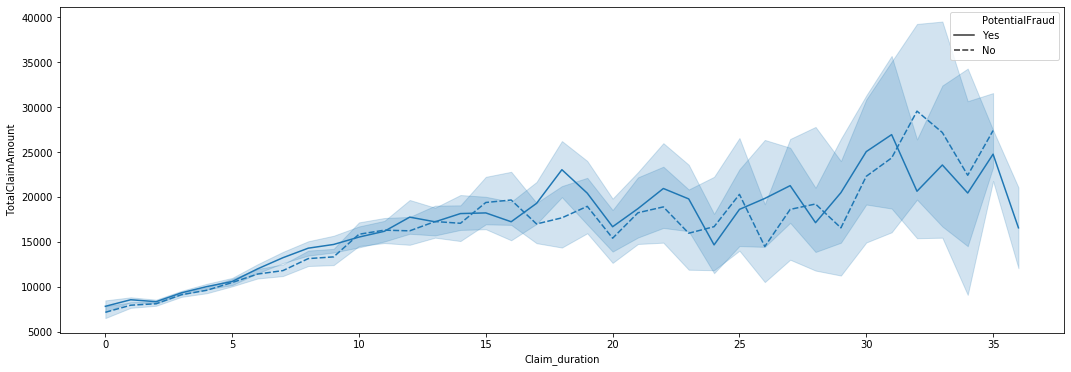

In [118]:
sns.lineplot(x = 'Claim_duration', y = 'TotalClaimAmount', data = Merged_train.loc[Merged_train.Type == 'Inpatient'] , style = 'PotentialFraud')

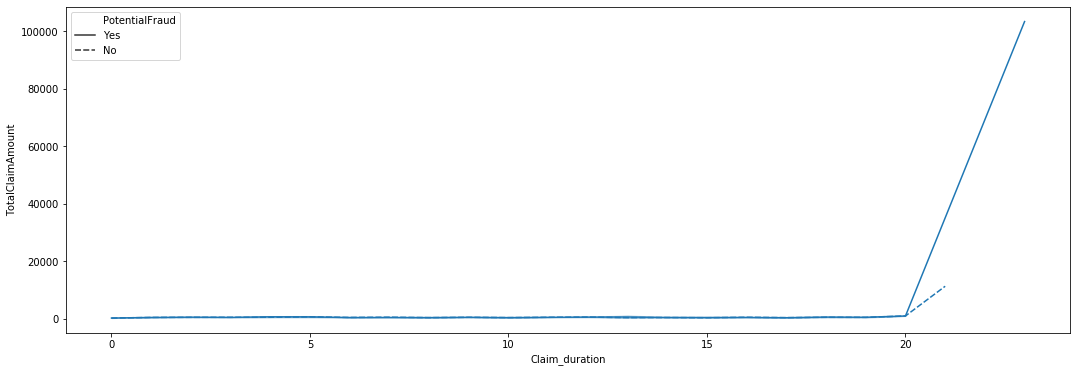

In [119]:
sns.lineplot(x = 'Claim_duration', y = 'TotalClaimAmount', data = Merged_train.loc[Merged_train.Type == 'Outpatient'] , style = 'PotentialFraud')

In [129]:
Merged_train.loc[(Merged_train.Claim_duration > 20) & (Merged_train.Type == 'Outpatient')]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type,InscReimbursedPercentage,Claim_duration,TotalClaimAmount
70845,BENE13669,1,2,0,34,730,12,12,0,1,0,0,0,0,0,1,0,0,0,139400,1068,102960,956,CLM82013,2009-09-14,2009-10-07,PRV55172,102500,PHY387333,PHY432582,None,0,85186,876.0,0,0,41011,42832,4239,5570,1122,48282,51881,0,0,0,4573.0,3811.0,0.0,0.0,0.0,Yes,3,68,2,0.0,0,38,Outpatient,99.152608,23,103376.0
82019,BENE56221,1,1,1,7,40,12,12,1,1,1,1,1,0,1,1,0,0,0,0,0,31680,2670,CLM82318,2009-05-15,2009-06-05,PRV57151,11300,PHY333893,None,PHY388853,0,185,0.0,0,0,V671,4019,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,7,86,7,0.0,4,20,Outpatient,100.000000,21,11300.0


In [125]:
Merged_train.loc[Merged_train.Claim_duration <= 20].groupby(['PotentialFraud', 'Type'])['PotentialFraud'].agg('count').to_frame()

PotentialFraud
PotentialFraud Type                      
No             Inpatient            16636
               Outpatient          328342
Yes            Inpatient            22562
               Outpatient          189393

In [135]:
df = Merged_train.groupby(['Type', 'PotentialFraud'])['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Count'}).reset_index()

In [136]:
df

,Type,PotentialFraud,Count
0,Inpatient,No,17072
1,Inpatient,Yes,23402
2,Outpatient,No,328343
3,Outpatient,Yes,189394


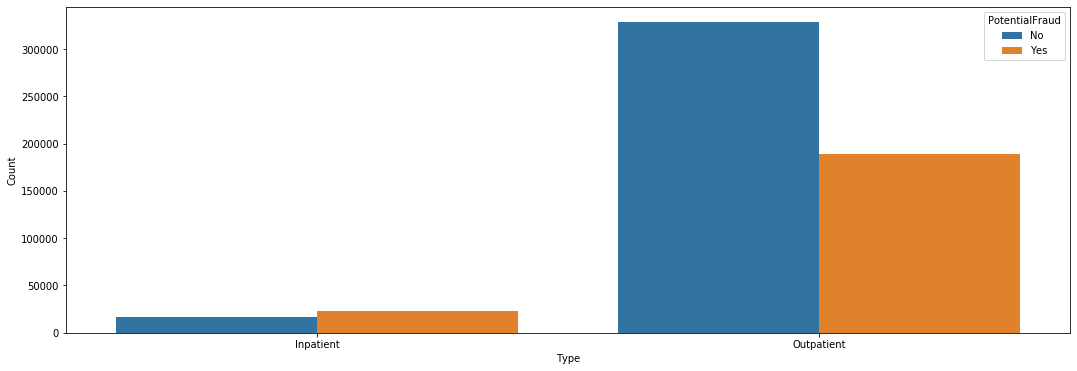

In [137]:
sns.barplot(x = 'Type', y = 'Count', hue = 'PotentialFraud', data = df)

### Consider mean daily total charges (i.e. total charge/duration), please describe their distribution. How do the Potential Fraud flag affect the distribution patterns?


In [114]:
Merged_train.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type,InscReimbursedPercentage,Claim_duration,TotalClaimAmount
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,Yes,3,66,7,6.0,6,15,Inpatient,96.054382,6,27068.0
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,No,3,66,7,2.0,0,36,Inpatient,82.399473,2,6068.0
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,No,3,66,7,3.0,3,38,Inpatient,82.399473,3,6068.0
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,Yes,1,96,5,12.0,1,4,Inpatient,94.678094,12,20068.0
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,Yes,1,87,2,18.0,5,42,Inpatient,94.088997,18,18068.0


In [150]:
df = Merged_train.groupby(['Provider', 'Type', 'PotentialFraud', 'Claim_Start_Week', 'Claim_Start_Day'])['TotalClaimAmount'].agg(['count', 'sum', 'mean']).reset_index()
df.head()

,Provider,Type,PotentialFraud,Claim_Start_Week,Claim_Start_Day,count,sum,mean
0,PRV51001,Inpatient,No,6,1,1,4068.0,4068.0
1,PRV51001,Inpatient,No,6,4,1,5068.0,5068.0
2,PRV51001,Inpatient,No,19,0,1,43068.0,43068.0
3,PRV51001,Inpatient,No,21,5,1,13068.0,13068.0
4,PRV51001,Inpatient,No,27,5,1,37068.0,37068.0


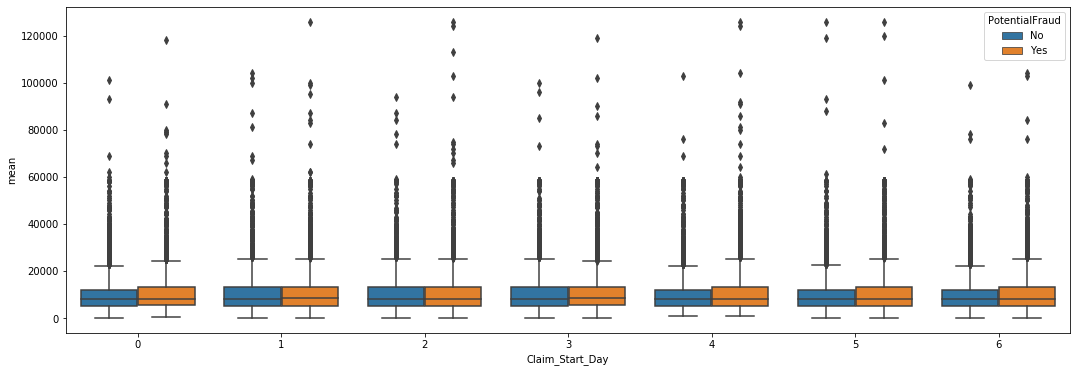

In [166]:
df = df.loc[df.Type == 'Inpatient']
sns.boxplot(x = 'Claim_Start_Day', y = 'mean', data = df, hue = 'PotentialFraud')

In [197]:
MBA_out_fraud = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/MBA_rules.csv')
MBA_in_fraud = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/MBA_rules2.csv')

In [205]:
pd.set_option('display.max_colwidth', 500)

In [213]:
MBA_out_fraud.loc[(MBA_out_fraud.confidence > 0.95) & (MBA_out_fraud.lift > 6.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
282,frozenset({'ClmDiagnosisCode_6'}),frozenset({'ClmDiagnosisCode_5'}),0.093783,0.143225,0.093783,1.000000,6.982010,0.080351,inf
2846,"frozenset({'ClmDiagnosisCode_6', 'ChronicCond_Diabetes'})",frozenset({'ClmDiagnosisCode_5'}),0.073292,0.143225,0.073292,1.000000,6.982010,0.062794,inf
3080,"frozenset({'ClmDiagnosisCode_6', 'ChronicCond_IschemicHeart'})",frozenset({'ClmDiagnosisCode_5'}),0.077088,0.143225,0.077088,1.000000,6.982010,0.066047,inf
3362,"frozenset({'ClmDiagnosisCode_6', 'AttendingPhysician'})",frozenset({'ClmDiagnosisCode_5'}),0.093562,0.143225,0.093562,1.000000,6.982010,0.080161,inf
3365,frozenset({'ClmDiagnosisCode_6'}),"frozenset({'AttendingPhysician', 'ClmDiagnosisCode_5'})",0.093783,0.142914,0.093562,0.997635,6.980683,0.080159,362.465872
...,...,...,...,...,...,...,...,...,...
140781,"frozenset({'ClmDiagnosisCode_6', 'ClmDiagnosisCode_1', 'ChronicCond_IschemicHeart'})","frozenset({'ClmDiagnosisCode_3', 'AttendingPhysician', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_2'})",0.077088,0.142914,0.076893,0.997466,6.979496,0.065876,338.201615
140791,"frozenset({'ClmDiagnosisCode_6', 'AttendingPhysician', 'ChronicCond_IschemicHeart'})","frozenset({'ClmDiagnosisCode_3', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_2'})",0.076893,0.143225,0.076893,1.000000,6.982010,0.065880,inf
140800,"frozenset({'ClmDiagnosisCode_6', 'ChronicCond_IschemicHeart', 'ClmDiagnosisCode_4'})","frozenset({'ClmDiagnosisCode_3', 'ClmDiagnosisCode_1', 'AttendingPhysician', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_2'})",0.077088,0.142914,0.076893,0.997466,6.979496,0.065876,338.201615
140804,"frozenset({'ClmDiagnosisCode_6', 'ClmDiagnosisCode_2', 'ChronicCond_IschemicHeart'})","frozenset({'ClmDiagnosisCode_3', 'ClmDiagnosisCode_1', 'AttendingPhysician', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5'})",0.077088,0.142914,0.076893,0.997466,6.979496,0.065876,338.201615


In [200]:
MBA_in_fraud.loc[(MBA_in_fraud.confidence > 0.9) & (MBA_in_fraud.lift > 4)].head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
216,frozenset({'ClmDiagnosisCode_5'}),frozenset({'ClmDiagnosisCode_4'}),0.143807,0.242962,0.143807,1.000000,4.115863,0.108867,inf
1960,"frozenset({'ChronicCond_Diabetes', 'ClmDiagnosisCode_5'})",frozenset({'ClmDiagnosisCode_4'}),0.109468,0.242962,0.109468,1.000000,4.115863,0.082871,inf
2126,"frozenset({'ChronicCond_IschemicHeart', 'ClmDiagnosisCode_5'})",frozenset({'ClmDiagnosisCode_4'}),0.116333,0.242962,0.116333,1.000000,4.115863,0.088068,inf
2300,"frozenset({'AttendingPhysician', 'ClmDiagnosisCode_5'})",frozenset({'ClmDiagnosisCode_4'}),0.143466,0.242962,0.143466,1.000000,4.115863,0.108609,inf
2303,frozenset({'ClmDiagnosisCode_5'}),"frozenset({'AttendingPhysician', 'ClmDiagnosisCode_4'})",0.143807,0.242359,0.143466,0.997628,4.116317,0.108613,319.413175
2361,"frozenset({'ClmDiagnosisCode_1', 'ClmDiagnosisCode_5'})",frozenset({'ClmDiagnosisCode_4'}),0.143807,0.242962,0.143807,1.000000,4.115863,0.108867,inf
2365,frozenset({'ClmDiagnosisCode_5'}),"frozenset({'ClmDiagnosisCode_1', 'ClmDiagnosisCode_4'})",0.143807,0.242962,0.143807,1.000000,4.115863,0.108867,inf
2379,"frozenset({'ClmDiagnosisCode_2', 'ClmDiagnosisCode_5'})",frozenset({'ClmDiagnosisCode_4'}),0.143807,0.242962,0.143807,1.000000,4.115863,0.108867,inf
2383,frozenset({'ClmDiagnosisCode_5'}),"frozenset({'ClmDiagnosisCode_2', 'ClmDiagnosisCode_4'})",0.143807,0.242962,0.143807,1.000000,4.115863,0.108867,inf
2384,"frozenset({'ClmDiagnosisCode_3', 'ClmDiagnosisCode_5'})",frozenset({'ClmDiagnosisCode_4'}),0.143807,0.242962,0.143807,1.000000,4.115863,0.108867,inf


In [210]:
link_analysis_features.loc[(link_analysis_features.ClmDiagnosisCode_6 == 1) & (link_analysis_features.PotentialFraud == 1)]

,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Type
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM46614,1,0,1,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1
CLM34721,0,0,1,1,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1
CLM72336,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1
CLM73394,0,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1
CLM56700,1,0,0,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM668889,1,0,0,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0
CLM517606,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
CLM290140,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
APhysician_Risk = A_Physician_Fraud.AttendingPhysician.value_counts().reset_index().rename(columns={'index':'AttendingPhysician','AttendingPhysician':'APhysician_Risk'})
APhysician_Risk['APhysician_Risk'] = pd.cut(APhysician_Risk['APhysician_Risk'], 5, labels=['1','2','3','4','5'])

In [227]:
Merged_train['PotentialFraud'] = Merged_train['PotentialFraud'].replace(['Yes', 'No'], [1, 0]) 

In [228]:
Merged_train.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type,InscReimbursedPercentage,Claim_duration,TotalClaimAmount
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,1,3,66,7,6.0,6,15,Inpatient,96.054382,6,27068.0
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,0,3,66,7,2.0,0,36,Inpatient,82.399473,2,6068.0
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,3,66,7,3.0,3,38,Inpatient,82.399473,3,6068.0
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,1,1,96,5,12.0,1,4,Inpatient,94.678094,12,20068.0
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,1,1,87,2,18.0,5,42,Inpatient,94.088997,18,18068.0


In [231]:
Fraud_Count = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('Provider')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count['Provider_Score'] = pd.cut(Fraud_Count['Fraud_Count'], 5, labels=['1','2','3','4','5'])
Fraud_Count = Fraud_Count.drop('Fraud_Count', axis = 1)
Fraud_Count

,Provider,Provider_Score
0,PRV51003,1
1,PRV51005,1
2,PRV51021,1
3,PRV51037,1
4,PRV51052,1
...,...,...
501,PRV57642,1
502,PRV57667,1
503,PRV57672,1
504,PRV57697,1


In [240]:
Merged_train = Merged_train.merge(right = Fraud_Count, how = 'left', on = 'Provider')

In [250]:
Fraud_Count_County = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('County')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count_County['County_Score'] = pd.cut(Fraud_Count_County['Fraud_Count'], 5, labels=['1','2','3','4','5'])
Fraud_Count_County = Fraud_Count_County.drop('Fraud_Count', axis = 1)
Fraud_Count_County

,County,County_Score
0,0,3
1,1,1
2,10,2
3,11,1
4,14,1
...,...,...
266,992,1
267,993,1
268,994,1
269,996,1


In [251]:
Merged_train = Merged_train.merge(right = Fraud_Count_County, how = 'left', on = 'County')

In [252]:
Fraud_Count_State = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('State')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count_State['State_Score'] = pd.cut(Fraud_Count_State['Fraud_Count'], 5, labels=['1','2','3','4','5'])
Fraud_Count_State = Fraud_Count_State.drop('Fraud_Count', axis = 1)
Fraud_Count_State

,State,State_Score
0,1,1
1,2,1
2,3,1
3,4,1
4,5,5
5,6,1
6,7,1
7,8,1
8,9,1
9,10,3


In [254]:
Merged_train = Merged_train.merge(right = Fraud_Count_State, how = 'left', on = 'State')

In [255]:
Fraud_Count_Patient = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('BeneID')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count_Patient['Patient_Score'] = pd.cut(Fraud_Count_Patient['Fraud_Count'], 5, labels=['1','2','3','4','5'])
Fraud_Count_Patient = Fraud_Count_Patient.drop('Fraud_Count', axis = 1)
Fraud_Count_Patient

,BeneID,Patient_Score
0,BENE100000,1
1,BENE100001,1
2,BENE100002,1
3,BENE100003,1
4,BENE100004,1
...,...,...
83992,BENE99993,1
83993,BENE99994,1
83994,BENE99995,1
83995,BENE99997,1


In [257]:
Merged_train = Merged_train.merge(right = Fraud_Count_Patient, how = 'left', on = 'BeneID')

In [259]:
Merged_train.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type,InscReimbursedPercentage,Claim_duration,TotalClaimAmount,Provider_Score,County_Score,State_Score,Patient_Score
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,1,3,66,7,6.0,6,15,Inpatient,96.054382,6,27068.0,1,1,2,1
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,0,3,66,7,2.0,0,36,Inpatient,82.399473,2,6068.0,NaN,1,2,1
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,3,66,7,3.0,3,38,Inpatient,82.399473,3,6068.0,NaN,1,2,1
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,1,1,96,5,12.0,1,4,Inpatient,94.678094,12,20068.0,1,1,2,1
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,1,1,87,2,18.0,5,42,Inpatient,94.088997,18,18068.0,1,1,2,1


In [298]:
Fraud_Count_Chronic_Condition_Count = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('Chronic_Condition_Count')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count_Chronic_Condition_Count['Chronic_Score'] = pd.cut(Fraud_Count_Chronic_Condition_Count['Fraud_Count'], 5, labels=['1','2','3','4','5'])
Fraud_Count_Chronic_Condition_Count = Fraud_Count_Chronic_Condition_Count.drop('Fraud_Count', axis = 1)
Fraud_Count_Chronic_Condition_Count

,Chronic_Condition_Count,Chronic_Score
0,0,2
1,1,3
2,2,4
3,3,5
4,4,5
5,5,5
6,6,5
7,7,4
8,8,3
9,9,2


In [300]:
Merged_train = Merged_train.merge(right = Fraud_Count_Chronic_Condition_Count, how = 'left', on = 'Chronic_Condition_Count')

In [287]:
Fraud_Count_AttendingPhysician = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('AttendingPhysician')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count_AttendingPhysician['AttendingPhysician_Score'] = pd.cut(Fraud_Count_AttendingPhysician['Fraud_Count'], 5, labels=['1','2','3','4','5'])
Fraud_Count_Age = Fraud_Count_Age.drop('Fraud_Count', axis = 1)
Fraud_Count_AttendingPhysician

,AttendingPhysician,Fraud_Count,AttendingPhysician_Score
0,None,564,2
1,PHY311002,1,1
2,PHY311008,2,1
3,PHY311011,17,1
4,PHY311017,1,1
...,...,...,...
20588,PHY434128,1,1
20589,PHY434140,9,1
20590,PHY434142,3,1
20591,PHY434153,1,1


In [289]:
Merged_train = Merged_train.merge(right = Fraud_Count_AttendingPhysician, how = 'left', on = 'AttendingPhysician')

In [323]:
Fraud_Count_TotalClaimAmount = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('TotalClaimAmount')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count_TotalClaimAmount['TotalClaimAmount_Score'] = pd.cut(Fraud_Count_TotalClaimAmount['Fraud_Count'], 5, labels=['1','2','3','4','5'])
Fraud_Count_TotalClaimAmount = Fraud_Count_TotalClaimAmount.drop('Fraud_Count', axis = 1)
Fraud_Count_TotalClaimAmount

,TotalClaimAmount,TotalClaimAmount_Score
0,0.0,2
1,10.0,5
2,20.0,3
3,30.0,4
4,40.0,4
...,...,...
537,120068.0,1
538,121068.0,1
539,124000.0,1
540,124068.0,1


In [324]:
Merged_train = Merged_train.merge(right = Fraud_Count_TotalClaimAmount, how = 'left', on = 'TotalClaimAmount')

In [364]:
Fraud_Count_Diagnosis_1 = Merged_train.loc[Merged_train.PotentialFraud == 1].groupby('ClmDiagnosisCode_1')['PotentialFraud'].agg('count').to_frame().rename(columns = {'PotentialFraud': 'Fraud_Count'}).reset_index()
Fraud_Count_Diagnosis_1['DiagnosisCode_1_Score'] = pd.cut(Fraud_Count_Diagnosis_1['Fraud_Count'], 5, labels=['1','2','3', '4', '5'])
Fraud_Count_Diagnosis_1 = Fraud_Count_Diagnosis_1.drop('Fraud_Count', axis = 1)
Fraud_Count_Diagnosis_1.sort_values(by = 'DiagnosisCode_1_Score', ascending = False).head(10)

,ClmDiagnosisCode_1,DiagnosisCode_1_Score
3399,4019,5
3398,4011,5
0,0,4
1611,2721,2
6346,78659,2
3561,42731,2
1612,2722,2
1613,2723,2
1614,2724,2
1610,2720,2


In [365]:
Merged_train = Merged_train.merge(right = Fraud_Count_Diagnosis_1, how = 'left', on = 'ClmDiagnosisCode_1')

In [367]:
Merged_train[['InscReimbursedPercentage', 'Provider_Score', 'County_Score', 'State_Score', 'Patient_Score', 'Age_Score', 'AttendingPhysician_Score', 'Chronic_Score', 'TotalClaimAmount_Score', 'DiagnosisCode_1_Score']] = \
Merged_train[['InscReimbursedPercentage', 'Provider_Score', 'County_Score', 'State_Score', 'Patient_Score', 'Age_Score', 'AttendingPhysician_Score', 'Chronic_Score', 'TotalClaimAmount_Score', 'DiagnosisCode_1_Score']].astype('float64').fillna(0)

In [374]:
Merged_train['Avg_Score'] = np.round(Merged_train[['Provider_Score', 'County_Score', 'State_Score', 'Patient_Score',\
 'Age_Score', 'AttendingPhysician_Score', 'Chronic_Score', 'TotalClaimAmount_Score', 'DiagnosisCode_1_Score']].sum(axis = 1)/9, 2)

In [375]:
Merged_train.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,PotentialFraud,Total_Claim_Count,Age,Chronic_Condition_Count,Hospital_Stay,Claim_Start_Day,Claim_Start_Week,Type,InscReimbursedPercentage,Claim_duration,TotalClaimAmount,Provider_Score,County_Score,State_Score,Patient_Score,Age_Score,AttendingPhysician_Score,Chronic_Score,TotalClaimAmount_Score,DiagnosisCode_1_Score,Avg_Score
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,1,3,66,7,6.0,6,15,Inpatient,96.054382,6,27068.0,1.0,1.0,2.0,1.0,5.0,1.0,4.0,1.0,1.0,1.89
1,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,0,3,66,7,2.0,0,36,Inpatient,82.399473,2,6068.0,0.0,1.0,2.0,1.0,5.0,0.0,4.0,1.0,1.0,1.67
2,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,3,66,7,3.0,3,38,Inpatient,82.399473,3,6068.0,0.0,1.0,2.0,1.0,5.0,0.0,4.0,1.0,1.0,1.67
3,BENE17521,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,0,7769.0,5849.0,0.0,0.0,0.0,1,1,96,5,12.0,1,4,Inpatient,94.678094,12,20068.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.56
4,BENE21718,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,0,9338.0,0.0,0.0,0.0,0.0,1,1,87,2,18.0,5,42,Inpatient,94.088997,18,18068.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,1.67


In [376]:
#Merged_train.to_csv('/Users/suborna/Github/Capstone_Project/Data/train_with_score.csv', index = False)